In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarWebQuery
from dustmaps.bayestar import BayestarQuery
from dustmaps.config import config
import dustmaps.bayestar

config['data_dir'] = '../Dustmaps/' 

In [20]:
#Collect the Dustmaps data, and place it into the config data directory specified above. This took a
#while (~10 min) but should only need to be done once now that the data is in the github repository. 
#The default of fetch() grabs the 2019 maps, I'd also now downloaded the 2015 maps

dustmaps.bayestar.fetch('bayestar2015') 

  4.5 GiB of 4.5 GiB | 937.1 KiB/s |################### |  99% | ETA:   0:00:00

In [29]:
#Read in existing data, including distances, galactic coords, and the
#Stilism E(B-V) values from Emma's spreadsheet
data = pd.read_csv('my_stars_file_with_stilism_reddening.csv')
distance = data['distance']
stilism_reddening = data['reddening[mag][stilism]']
l = data['l']  # galactic longitude and latitude
b = data['b'] 

0
0
0


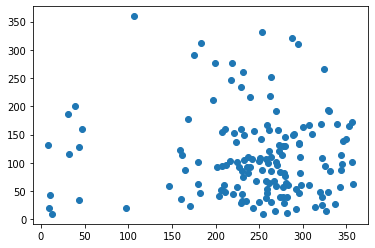

In [30]:
plt.scatter(l,distance)
print(sum(np.isnan(l)))
print(sum(np.isnan(b)))
print(sum(np.isnan(distance)))

In [35]:
#Now generate the Green E(B-V) values
green_reddening = []

#bayestar = BayestarQuery(version='bayestar2017')
bayestar = BayestarQuery(max_samples=2, version='bayestar2015')

for i in range(len(distance)):
    coords = SkyCoord(l[i]*units.deg, b[i]*units.deg,
                   distance=distance[i]*units.pc, frame='galactic')
    g_reddening = bayestar(coords, mode='random_sample') #Returns E(B-V) 
    green_reddening.append(g_reddening)
    print(l[i],b[i],g_reddening)


Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
  nside = 2048
t = 12.002 s
  pix_info:   0.380 s
   samples:   5.275 s
      best:   2.600 s
       nan:   0.023 s
      sort:   3.644 s
       idx:   0.081 s
233.1863977 -39.77861782 nan
182.7785223 -60.77695972 0.0019805266
46.88745161 -67.49917392 0.012621878
146.9174816 -70.05660536 0.00016043015
241.6196566 -35.06362196 nan
277.6124912 28.11047284 0.0011731657
259.3950847 23.62931261 0.00097640615
280.7833709 24.19180962 nan
230.330051 -28.13733199 0.000362147
252.7867792 37.86999045 0.007301986
97.44511523 -71.21821966 0.0006697353
259.8035738 -76.65306877 nan
223.2721116 -45.92620876 0.0046148472
329.234592 38.0971826 0.021222025
30.66605709 -62.29427274 0.007341555
32.33985651 -63.81846902 0.0071446826
295.7704468 -42.